# Basic Example

## Importing packages

You first need to import the `af_analysis` package:

In [1]:
import af_analysis

%matplotlib inline

## Importing Alphafold Data 

To import your data, create a `af_analysis.Data` object by giving the path of Alphafold directorie:

In [2]:
DATA_PATH = '../../../src/af_analysis/test/inputs/beta_amyloid_dimer_cf_1.5.5/'
my_data = af_analysis.Data(DATA_PATH)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

You now have access to a pandas `DataFrame` containing all models:

In [3]:
my_data.df.head(2)

query  seed  model                  weight  recycle  \
0  beta_amyloid_dimer_d2fa3_0     0      1  alphafold2_multimer_v3        9   
1  beta_amyloid_dimer_d2fa3_0     0      2  alphafold2_multimer_v3       16   

   pLDDT    pTM    ipTM  ranking_confidence         format  \
0   38.8  0.159  0.0812             0.09676  colabfold_1.5   
1   35.2  0.130  0.0685             0.08080  colabfold_1.5   

                                                 pdb relaxed_pdb  \
0  ../../../src/af_analysis/test/inputs/beta_amyl...        None   
1  ../../../src/af_analysis/test/inputs/beta_amyl...        None   

                                                json  
0  ../../../src/af_analysis/test/inputs/beta_amyl...  
1  ../../../src/af_analysis/test/inputs/beta_amyl...

For each query of the directorie, the chains IDs and chain length will be store in `chains` and `chain_length` properties of the `Data` object:

In [4]:
my_data.chain_length

{'beta_amyloid_dimer_d2fa3_0': [42, 42]}

In [5]:
my_data.chains

{'beta_amyloid_dimer_d2fa3_0': ['A', 'B']}

## Analysing scores

You can then sort or extract your models based on the score you are interrested in:

* pLDDT
* pTM
* ipTM
* ranking_confidence

Here I am extracting the best `ipTM` model index:

In [6]:
best_ipTM_index = my_data.df['ipTM'].idxmax()
worst_ipTM_index = my_data.df['ipTM'].idxmin()

You can get access to all its caracteristics:

In [7]:
my_data.df.iloc[best_ipTM_index]

query                                        beta_amyloid_dimer_d2fa3_0
seed                                                                  2
model                                                                 5
weight                                           alphafold2_multimer_v3
recycle                                                               9
pLDDT                                                              68.3
pTM                                                               0.628
ipTM                                                              0.604
ranking_confidence                                               0.6088
format                                                    colabfold_1.5
pdb                   ../../../src/af_analysis/test/inputs/beta_amyl...
relaxed_pdb           ../../../src/af_analysis/test/inputs/beta_amyl...
json                  ../../../src/af_analysis/test/inputs/beta_amyl...
Name: 14, dtype: object

### Plots

You can plot the the pLDDT for one model:

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Residue', ylabel='predicted LDDT'>)

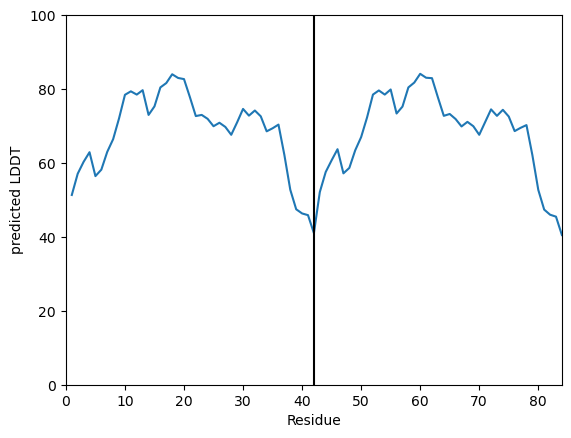

In [8]:
my_data.plot_plddt([best_ipTM_index])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Residue', ylabel='predicted LDDT'>)

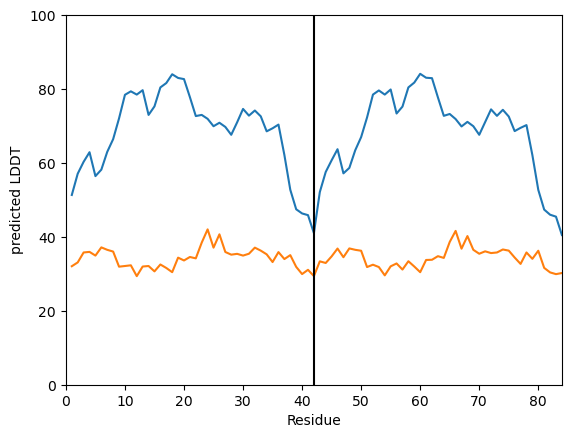

In [9]:
my_data.plot_plddt([best_ipTM_index, worst_ipTM_index])

And also have a look on the Predicted Aligned Error (PAE) matrix:

(<Figure size 640x480 with 2 Axes>, <Axes: >)

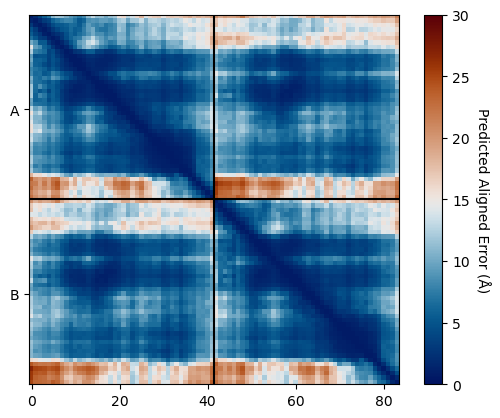

In [10]:
my_data.plot_pae(best_ipTM_index)

### show 3D structure

The 3D structure can be represented using the `nglview` library:

In [11]:
view = my_data.show_3d(best_ipTM_index)
view

NGLWidget()

In [12]:
import nglview
nglview.write_html('../_static/dimer.html', [view])

In [13]:
from IPython.display import IFrame

In [14]:
IFrame(src='../_static/dimer.html', width=600, height=300)

## Computing scores

Additional scores can be computed as the pdockq and pdockq2:

In [15]:
from af_analysis import analysis

#compute_pdockq
analysis.pdockq(my_data)
#compute_pdockq2
analysis.pdockq2(my_data)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Some additional scores have been compute to caracterise the protein-peptide structures:

In [16]:
from af_analysis import docking

#extract_pae_pep
docking.pae_pep(my_data)
#compute_pdockq2_lig
docking.pdockq2_lig(my_data)
#compute_LIS_pep
docking.LIS_pep(my_data)
#extract_plddt_pep
docking.plddt_pep(my_data)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [17]:
my_data.df.columns

Index(['query', 'seed', 'model', 'weight', 'recycle', 'pLDDT', 'pTM', 'ipTM',
       'ranking_confidence', 'format', 'pdb', 'relaxed_pdb', 'json', 'pdockq',
       'pdockq2_A', 'pdockq2_B', 'PAE_pep_rec', 'PAE_rec_pep', 'pdockq2_lig',
       'LIS', 'LIS_rec_pep', 'LIS_pep_rec', 'plddt_pep'],
      dtype='object')

## Clustering

Eventually the obtain models can be clustered to have a better idea oh AlphaFold model diversity. Here we are using
a thresold of 4 Å with hierarchical clustering:

/home/murail/miniforge3/envs/SST2/lib/python3.12/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(
/home/murail/miniforge3/envs/SST2/lib/python3.12/site-packages/MDAnalysis/coordinates/base.py:728: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

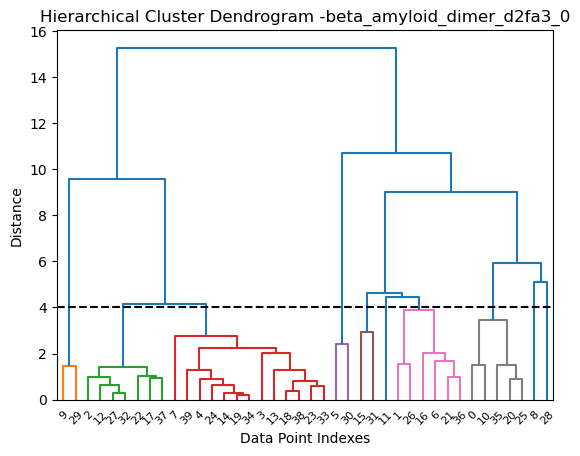

In [18]:
from af_analysis import clustering
clustering.hierarchical(my_data.df, threshold=4)

Alternatively, the RMSD can be normalized and scaled using Bjorn Wallner scaling. Here we are using
a thresold of 0.3 with hierarchical clustering:

/home/murail/miniforge3/envs/SST2/lib/python3.12/site-packages/MDAnalysis/coordinates/base.py:728: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

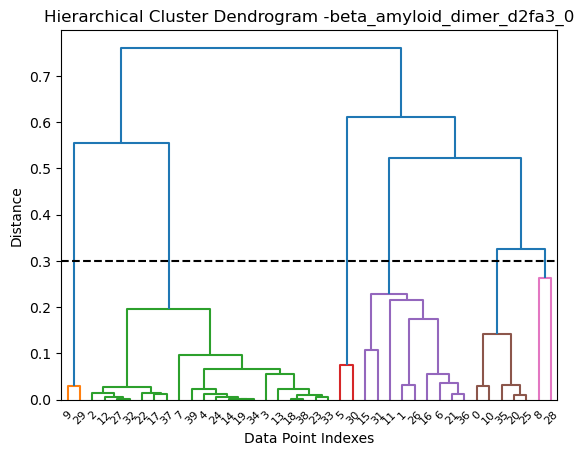

In [19]:
clustering.hierarchical(my_data.df, threshold=0.3, rmsd_scale=True)

## Multidimensional scaling representation

Multidimensional scaling (MDS) coordinates are computed from the distance matrix and added in the dataframe:

<Axes: xlabel='MDS 1', ylabel='MDS 2'>

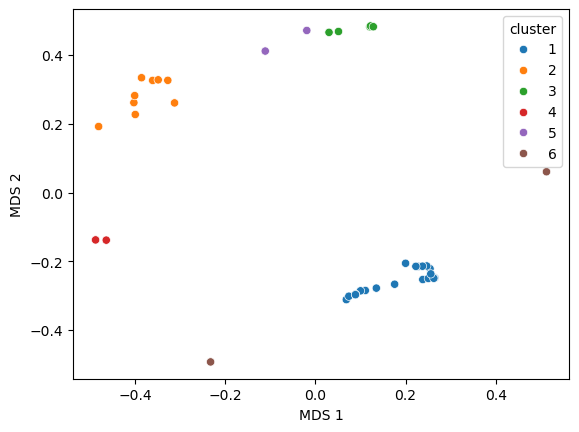

In [20]:
import seaborn as sns
sns.scatterplot(data=my_data.df, x='MDS 1', y='MDS 2', hue='cluster')